In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob
import sys
import tensorflow
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Flatten,Activation,LeakyReLU,ReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import relu,sigmoid
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16
import warnings
warnings.filterwarnings("ignore")

 **Paths for train and test data**

In [ ]:
#for train data
from glob import glob
glob('/content/drive/MyDrive/top mentor deep learning/30.09.2023/Car-Bike-Dataset/Train_set')

['/content/drive/MyDrive/top mentor deep learning/30.09.2023/Car-Bike-Dataset/Train_set']

In [ ]:
#for test data
from glob import glob
glob('/content/drive/MyDrive/top mentor deep learning/30.09.2023/Car-Bike-Dataset/Test_set')

['/content/drive/MyDrive/top mentor deep learning/30.09.2023/Car-Bike-Dataset/Test_set']

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 250, 250, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 250, 250, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 125, 125, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 125, 125, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 125, 125, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 62, 62, 128)       0   

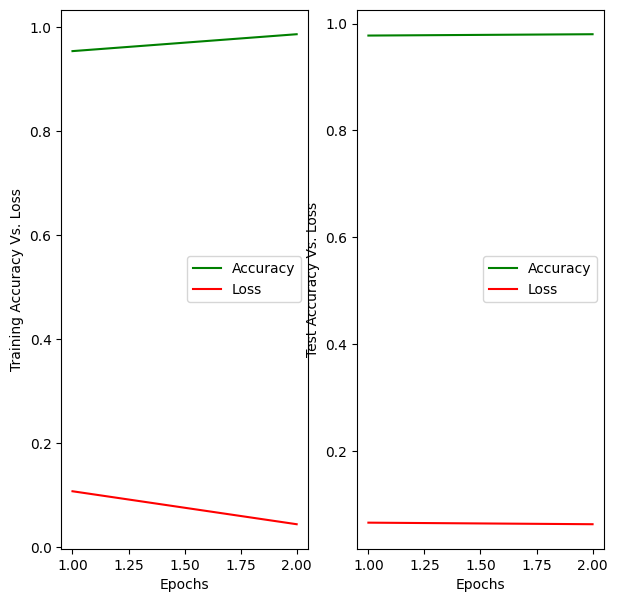

Original image size:(256, 386, 3)
resized iamge:(250, 250, 3)
1/1 [==============================] - 1s 887ms/step
Prediction is = Bike


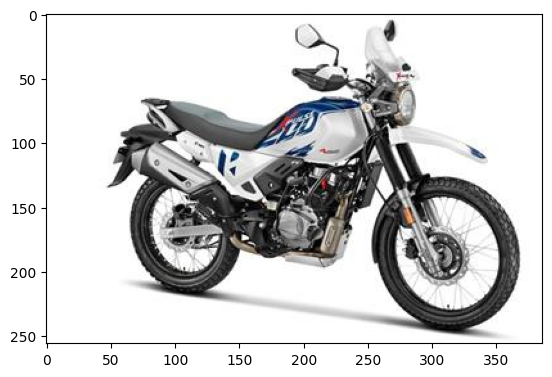

In [ ]:
class VGG16_Binary:
  def __init__(self):
    self.Train_data_path = '/content/drive/MyDrive/top mentor deep learning/30.09.2023/Car-Bike-Dataset/Train_set'
    self.Test_data_path = '/content/drive/MyDrive/top mentor deep learning/30.09.2023/Car-Bike-Dataset/Test_set'
    self.height,self.width = 250,250  #resizing of image
    self.labels = ['Car','Bike']




  def Architecture(self,Train_data_preprocess,Test_data_preprocess):
    try:
      vgg16=VGG16(input_shape=(self.height,self.width,3),weights='imagenet',include_top=False)
      for layers in vgg16.layers:
        layers.trainable=False
      x=Flatten()(vgg16.output)
      predict=Dense(1,activation='sigmoid')(x)
      model=Model(inputs=vgg16.inputs,outputs=predict)
      print(model.summary())
      train_data=Train_data_preprocess.flow_from_directory(self.Train_data_path,target_size=(self.height,self.width),classes=self.labels,batch_size=32,class_mode='binary')
      test_data=Test_data_preprocess.flow_from_directory(self.Test_data_path,target_size=(self.height,self.width),classes=self.labels,class_mode='binary',batch_size=32)
      model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
      model.fit(train_data,epochs=2,validation_data=test_data,steps_per_epoch=len(train_data))
      return model

    except:
        print(f'error in main:',sys.exc_info())


  def EDA_validation(self,model):
    try:
      model.history.history.keys()
      training_acc = model.history.history['accuracy']
      training_loss= model.history.history['loss']
      test_acc= model.history.history['val_accuracy']
      test_loss= model.history.history['val_loss']
      plt.figure(figsize=(7,7))
      plt.title('Car and Bike VGG16 classification')
      plt.subplot(1,2,1)
      plt.plot(np.arange(1,3),training_acc,color='g',label='Accuracy')
      plt.plot(np.arange(1,3),training_loss,color='r',label='Loss')
      plt.xlabel('Epochs')
      plt.ylabel('Training Accuracy Vs. Loss')
      plt.legend(loc=0)
      plt.subplot(1,2,2)
      plt.plot(np.arange(1,3),test_acc,color='g',label='Accuracy')
      plt.plot(np.arange(1,3),test_loss,color='r',label='Loss')
      plt.xlabel('Epochs')
      plt.ylabel('Test Accuracy Vs. Loss')
      plt.legend(loc=0)
      plt.show()
      return model

    except:
      print(f'error in main:',sys.exc_info())


  def pred(self,model):
    try:
      img_1=plt.imread('/content/drive/MyDrive/top mentor deep learning/30.09.2023/Car-Bike-Dataset/testing images/Hero-MotoCorp-Xpulse-200-4V-290520231049.jpg')
      plt.imshow(img_1)
      print(f'Original image size:{img_1.shape}')
      img_1=cv2.resize(img_1,(self.height,self.width))  #resizing the image as done with train data
      print('resized iamge:{}'.format(img_1.shape))
      img_1=np.array(img_1/255.0)#rescaling of image
      img_1=np.expand_dims(img_1,axis=0)#expanding dimension
      result=model.predict(img_1)
      if result[0][0]>0.5:
        print('Prediction is = Bike')
      else:
        print('Prediction is = Car')


    except:
      print(f'error in main:',sys.exc_info())


  def data_preprocess(self):
    try:
      Train_data_preprocess = ImageDataGenerator(rescale=1.0/255.0,horizontal_flip=True,shear_range=0.2,zoom_range=0.2)
      Test_data_preprocess = ImageDataGenerator(rescale=1.0/255.0)
      model=self.Architecture(Train_data_preprocess,Test_data_preprocess)
      self.EDA_validation(model)
      self.pred(model)
    except:
      print(f'error in main:',sys.exc_info())

if __name__=='__main__':
  try:
    obj=VGG16_Binary()
    obj.data_preprocess()

  except:
    print(f'error in main:',sys.exc_info())
